##### Scikit-tda

######  Persistence images from geographical data

In [1]:
#!pip install scikit-tda

In [14]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import cm
import geopandas as gpd

/Users/h6x/anaconda3/envs/TDA/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
import ripser
import persim

##### Importing geodata

In [5]:
WySviRaw = gpd.read_file('./wyoming/data/processed data/SVI2018 WY counties with death rate HepVu/SVI2018_WY_counties_with_death_rate_HepVu.shp')

In [6]:
geometry_df = WySviRaw[['FIPS','geometry']]

In [7]:
geometry_df.head(3)

,FIPS,geometry
0,56003,"POLYGON ((-108.62184 44.99613, -108.62182 44.9..."
1,56007,"POLYGON ((-107.92977 41.65419, -107.92974 41.6..."
2,56009,"POLYGON ((-106.07807 43.49447, -106.01737 43.4..."


In [15]:
# create a new column in df that contains the x and y coordinates of the centroid of each polygon
geometry_df['coords'] = geometry_df['geometry'].apply(lambda x: x.representative_point().coords[:])
geometry_df['coords'] = [coords[0] for coords in geometry_df['coords']]

/Users/h6x/anaconda3/envs/TDA/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


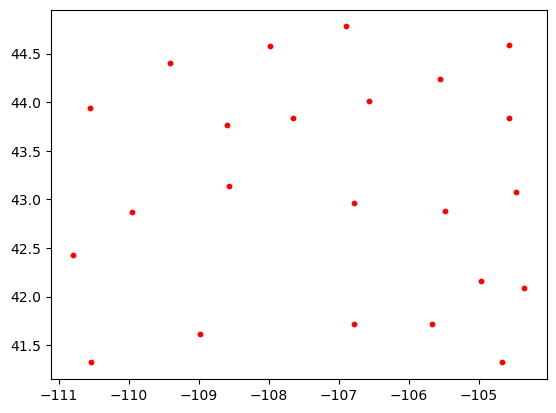

In [16]:
# plotting the centroids
plt.scatter(*zip(*geometry_df['coords']), s=10, c='r')
plt.show()

In [17]:
# put each coordinates into array and then stack them together
data_coordinates = np.array([np.array(coord) for coord in geometry_df['coords']])

In [18]:
data_coordinates.shape

(23, 2)

##### Ploting persistence diagrams for point cloud data(geodata)

In [19]:
def diagram_sizes(dgms):
    return ", ".join([f"|$H_{i}$|={len(d)}" for i, d in enumerate(dgms)])

##### Method 1

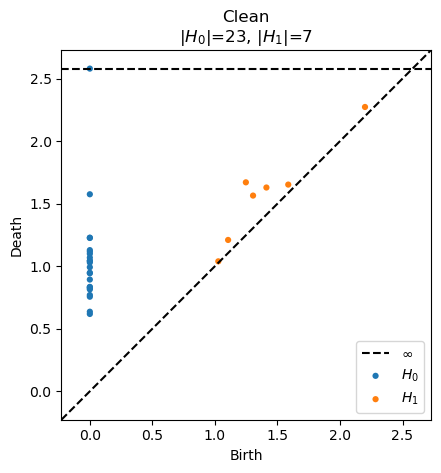

In [20]:
dgm_clean = ripser.ripser(data_coordinates)['dgms']
persim.plot_diagrams(
    dgm_clean,
    show=True,
    title=f"Clean\n{diagram_sizes(dgm_clean)}"
)

##### Method 2

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


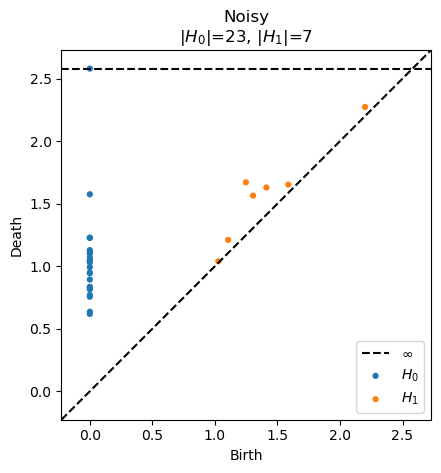

In [21]:
from ripser import Rips
rips = Rips()
dgm_wyoming = rips.transform(data_coordinates)
rips.plot(show=True, title=f"Noisy\n{diagram_sizes(dgm_wyoming)}")

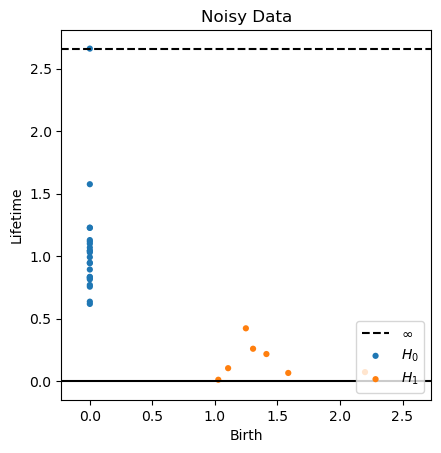

In [22]:
persim.plot_diagrams(
    dgm_wyoming,
    title="Noisy Data",
    lifetime=True,
    show=True
)

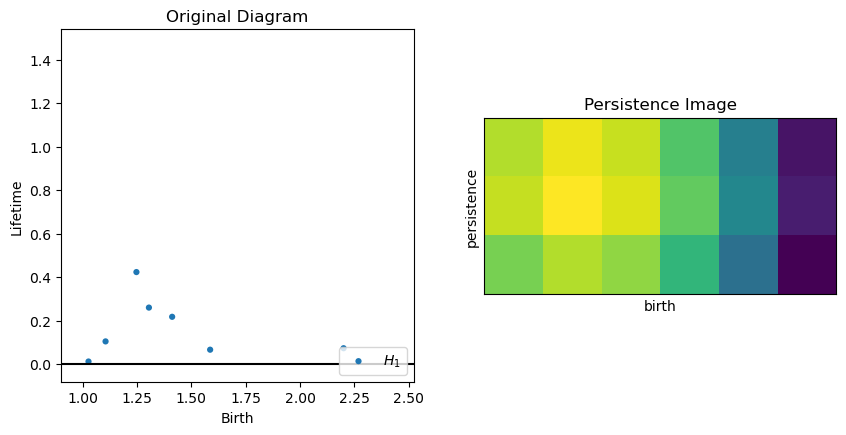

In [23]:
from persim import PersistenceImager

pimager = PersistenceImager(pixel_size=0.2)

# The `fit()` method can be called on one or more (*,2) numpy arrays
# to automatically determine the miniumum birth and persistence ranges needed to capture all persistence pairs.
# The ranges and resolution are automatically adjusted to accomodate the specified pixel size.
pimager.fit(dgm_wyoming[1:3])

# The `transform()` method can then be called on one or more (*,2) numpy arrays
# to generate persistence images from diagrams.
imgs = pimager.transform(dgm_wyoming[1:3])

fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].set_title("Original Diagram")
persim.plot_diagrams(dgm_wyoming[1:3],  lifetime=True, ax=axs[0], labels=["$H_1$", "$H_2$"])

axs[1].set_title("Persistence Image")
pimager.plot_image(imgs[0], ax=axs[1])
plt.show()

##### Persistence Landscapes

In [24]:
dgms_wy = ripser.ripser(data_coordinates, maxdim=2)['dgms']

In [25]:
from persim import PersLandscapeApprox, PersLandscapeExact
from persim.landscapes import plot_landscape_simple

pla = PersLandscapeApprox(dgms=dgm_wyoming,hom_deg=0)
ax = plot_landscape_simple(pla, depth_range=range(10))

##### Storage of diagrams
dgms - diagram informations

In [26]:
data = ripser.ripser(data_coordinates, maxdim=2)

In [27]:
print(data.keys())

dict_keys(['dgms', 'cocycles', 'num_edges', 'dperm2all', 'idx_perm', 'r_cover'])


In [28]:
data['dgms']

[array([[0.        , 0.61818582],
        [0.        , 0.63626379],
        [0.        , 0.75611877],
        [0.        , 0.76975465],
        [0.        , 0.81474233],
        [0.        , 0.82400411],
        [0.        , 0.83168441],
        [0.        , 0.83470851],
        [0.        , 0.89327586],
        [0.        , 0.94367933],
        [0.        , 0.94796997],
        [0.        , 0.99185222],
        [0.        , 1.02945971],
        [0.        , 1.04245818],
        [0.        , 1.04312027],
        [0.        , 1.06845665],
        [0.        , 1.09901524],
        [0.        , 1.1155889 ],
        [0.        , 1.12855875],
        [0.        , 1.22580111],
        [0.        , 1.22833312],
        [0.        , 1.57510161],
        [0.        ,        inf]]),
 array([[2.19983959, 2.27290154],
        [1.586285  , 1.652542  ],
        [1.41161966, 1.62912273],
        [1.30482137, 1.56469655],
        [1.24739003, 1.67056787],
        [1.10546327, 1.20986855],
        [1.0

##### Ripser options
ripser class method returns diagram  data directly, better to use the below method.

In [29]:
persiatance_data = ripser.ripser(data_coordinates, maxdim=2)

In [30]:
print(persiatance_data.keys())

dict_keys(['dgms', 'cocycles', 'num_edges', 'dperm2all', 'idx_perm', 'r_cover'])


In [31]:
data_dgm = persiatance_data['dgms']

##### Plotting all the dimentions

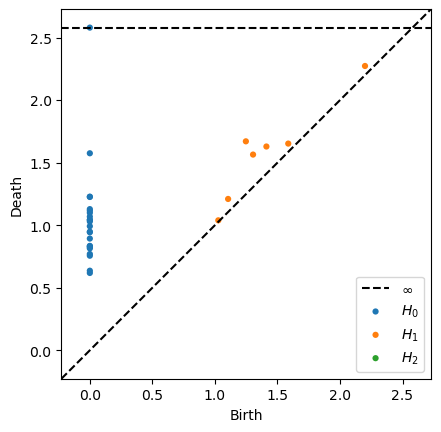

In [33]:
persim.plot_diagrams(data_dgm, show=True)

##### Plotting H_1 persistance

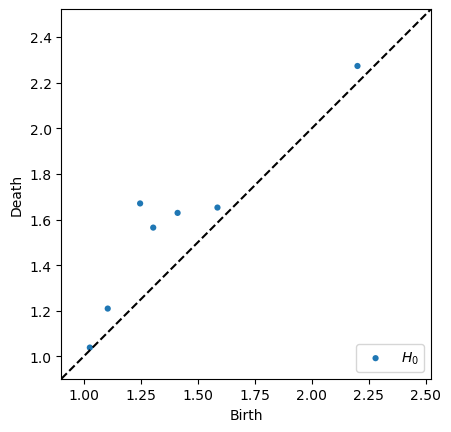

In [34]:
persim.plot_diagrams(data_dgm[1], show=True)

##### Plotting H_0 persistance

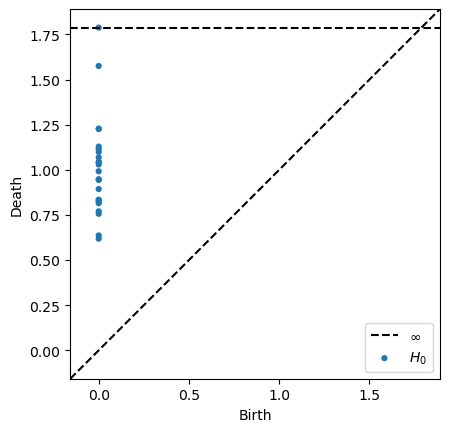

In [35]:
persim.plot_diagrams(data_dgm[0], show=True)

#####  Persistence Images

In [62]:
# Persistanace for H_1

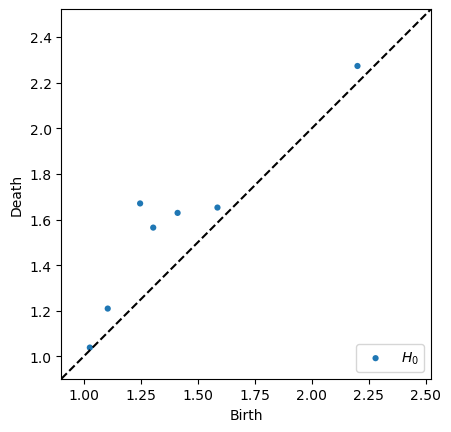

In [53]:
persim.plot_diagrams(data_dgm[1], show=True)

In [51]:
pimgr = PersistenceImager(pixel_size=0.1)
pimgr.fit(data_dgm[1])
imgs = pimgr.transform(data_dgm[1])
print(f"PI Resolution = {pimgr.resolution}")


PI Resolution = (12, 5)


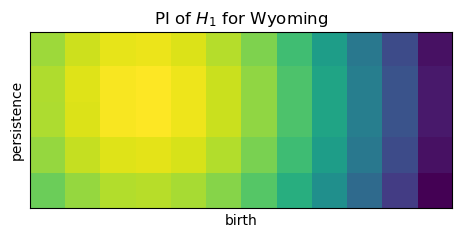

In [52]:
plt.figure(figsize=(12, 7))
ax = plt.subplot(121)
pimgr.plot_image(imgs, ax)
plt.title("PI of $H_1$ for Wyoming")
plt.show()

In [63]:
# Persistanace for H_0

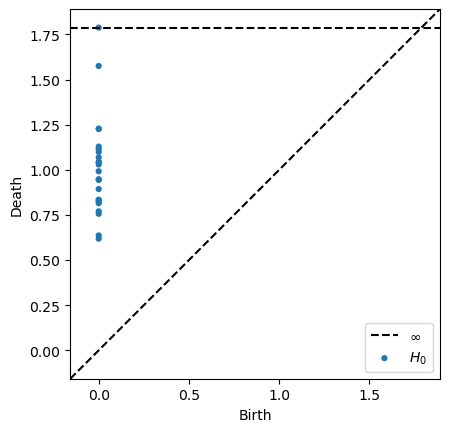

In [54]:
persim.plot_diagrams(data_dgm[0], show=True)

In [57]:
data_dgm[0]

array([[0.        , 0.61818582],
       [0.        , 0.63626379],
       [0.        , 0.75611877],
       [0.        , 0.76975465],
       [0.        , 0.81474233],
       [0.        , 0.82400411],
       [0.        , 0.83168441],
       [0.        , 0.83470851],
       [0.        , 0.89327586],
       [0.        , 0.94367933],
       [0.        , 0.94796997],
       [0.        , 0.99185222],
       [0.        , 1.02945971],
       [0.        , 1.04245818],
       [0.        , 1.04312027],
       [0.        , 1.06845665],
       [0.        , 1.09901524],
       [0.        , 1.1155889 ],
       [0.        , 1.12855875],
       [0.        , 1.22580111],
       [0.        , 1.22833312],
       [0.        , 1.57510161],
       [0.        ,        inf]])

In [58]:
# get the data_dgm without the infinite values raw
data_dgm_no_inf = data_dgm[0][:-1]

In [59]:
data_dgm_no_inf

array([[0.        , 0.61818582],
       [0.        , 0.63626379],
       [0.        , 0.75611877],
       [0.        , 0.76975465],
       [0.        , 0.81474233],
       [0.        , 0.82400411],
       [0.        , 0.83168441],
       [0.        , 0.83470851],
       [0.        , 0.89327586],
       [0.        , 0.94367933],
       [0.        , 0.94796997],
       [0.        , 0.99185222],
       [0.        , 1.02945971],
       [0.        , 1.04245818],
       [0.        , 1.04312027],
       [0.        , 1.06845665],
       [0.        , 1.09901524],
       [0.        , 1.1155889 ],
       [0.        , 1.12855875],
       [0.        , 1.22580111],
       [0.        , 1.22833312],
       [0.        , 1.57510161]])

In [87]:
pimgr = PersistenceImager(pixel_size=0.1)
pimgr.fit(data_dgm_no_inf)
imgs = pimgr.transform(data_dgm_no_inf)
print(f"PI Resolution = {pimgr.resolution}")

PI Resolution = (0, 10)


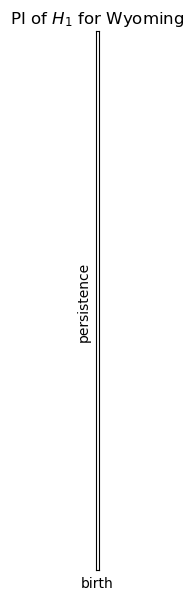

In [88]:
plt.figure(figsize=(12, 7))
ax = plt.subplot(121)
pimgr.plot_image(imgs, ax)
plt.title("PI of $H_1$ for Wyoming")
plt.show()

In [64]:
# Persistanace for H_1 with Lifetime plots

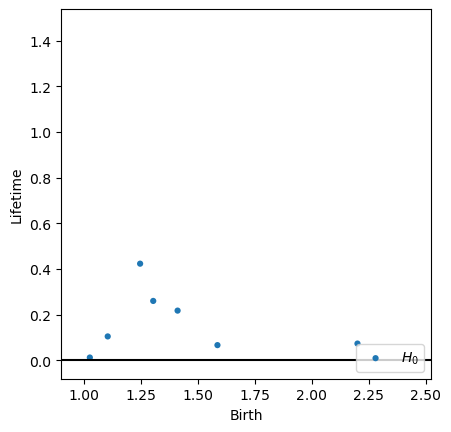

In [66]:
persim.plot_diagrams(data_dgm[1], show=True, lifetime=True)

In [72]:
# using the class module

In [67]:
rips = ripser.Rips(maxdim=1, coeff=2)
diagrams_h1 = rips.fit_transform(data_coordinates)[1]

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


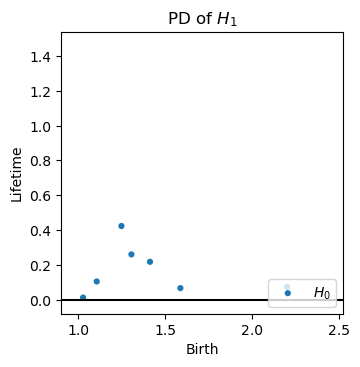

In [70]:
plt.figure(figsize=(8,4))

plt.subplot(121)
rips.plot(diagrams_h1, show=False, lifetime=True)
plt.title("PD of $H_1$")
plt.show()

In [73]:
pimgr = PersistenceImager(pixel_size=0.1)
pimgr.fit(diagrams_h1)
imgs = pimgr.transform(diagrams_h1)
print(f"PI Resolution = {pimgr.resolution}")

PI Resolution = (12, 5)


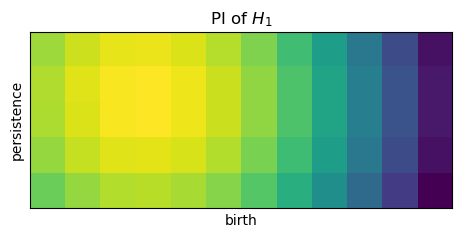

In [75]:
plt.figure(figsize=(12, 7))
ax = plt.subplot(121)
pimgr.plot_image(imgs, ax)
plt.title("PI of $H_1$")
plt.show()

In [76]:
# Persistanace for H_0 with Lifetime plots

In [77]:
diagrams_h0 = rips.fit_transform(data_coordinates)[0]

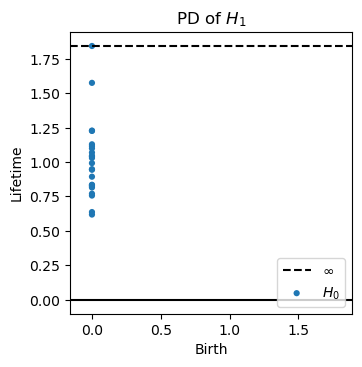

In [80]:
plt.figure(figsize=(8,4))

plt.subplot(121)
rips.plot(diagrams_h0, show=False, lifetime=True)
plt.title("PD of $H_1$")
plt.show()

In [78]:
diagrams_h0

array([[0.        , 0.61818582],
       [0.        , 0.63626379],
       [0.        , 0.75611877],
       [0.        , 0.76975465],
       [0.        , 0.81474233],
       [0.        , 0.82400411],
       [0.        , 0.83168441],
       [0.        , 0.83470851],
       [0.        , 0.89327586],
       [0.        , 0.94367933],
       [0.        , 0.94796997],
       [0.        , 0.99185222],
       [0.        , 1.02945971],
       [0.        , 1.04245818],
       [0.        , 1.04312027],
       [0.        , 1.06845665],
       [0.        , 1.09901524],
       [0.        , 1.1155889 ],
       [0.        , 1.12855875],
       [0.        , 1.22580111],
       [0.        , 1.22833312],
       [0.        , 1.57510161],
       [0.        ,        inf]])

In [82]:
# get the data_dgm without the infinite values raw
dgm_h0_no_inf_ = diagrams_h0[:-1]

In [93]:
pimgr = PersistenceImager(pixel_size=1)
pimgr.fit(dgm_h0_no_inf_)
imgs = pimgr.transform(dgm_h0_no_inf_)
print(f"PI Resolution = {pimgr.resolution}")

PI Resolution = (0, 1)


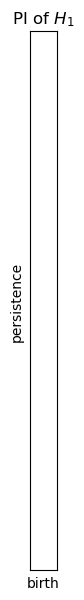

In [94]:
plt.figure(figsize=(12, 7))
ax = plt.subplot(121)
pimgr.plot_image(imgs, ax)
plt.title("PI of $H_1$")
plt.show()

#####  Test 2

In [96]:
from itertools import product

import time
import numpy as np
from sklearn import datasets
from scipy.stats import multivariate_normal as mvn
import matplotlib.pyplot as plt

from ripser import Rips
from persim import PersistenceImager

In [97]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [98]:
# Printing a PersistenceImager() object will print its defining attributes
pimgr = PersistenceImager(pixel_size=0.2, birth_range=(0,1))
print(pimgr)

PersistenceImager(birth_range=(0.0, 1.0), pers_range=(0.0, 1.0), pixel_size=0.2, weight=persistence, weight_params={'n': 1.0}, kernel=gaussian, kernel_params={'sigma': [[1.0, 0.0], [0.0, 1.0]]})


In [99]:
# PersistenceImager() attributes can be adjusted at or after instantiation.
# Updating attributes of a PersistenceImager() object will automatically update all other dependent attributes.
pimgr.pixel_size = 0.1
pimgr.birth_range = (0, 2)
print(pimgr)
print(pimgr.resolution)

PersistenceImager(birth_range=(0.0, 2.0), pers_range=(0.0, 1.0), pixel_size=0.1, weight=persistence, weight_params={'n': 1.0}, kernel=gaussian, kernel_params={'sigma': [[1.0, 0.0], [0.0, 1.0]]})
(20, 10)


In [100]:
rips = Rips()
dgms = rips.fit_transform(data_coordinates)
H0_dgm = dgms[0]
H1_dgm = dgms[1]

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


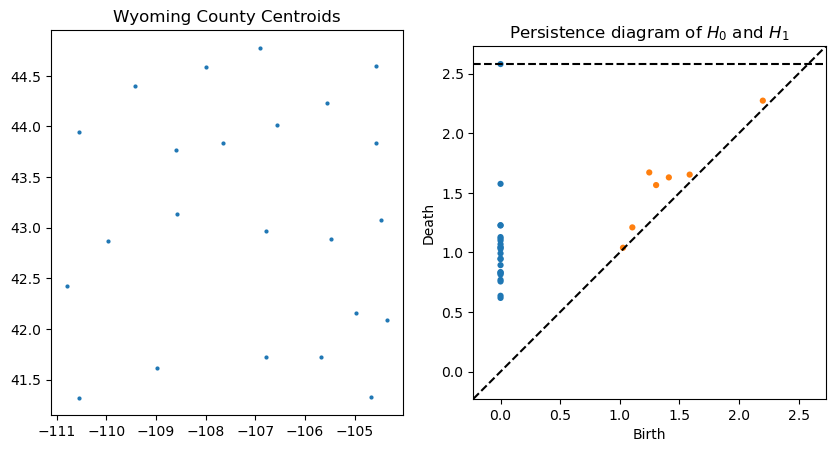

In [103]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(data_coordinates[:,0], data_coordinates[:,1], s=4)
plt.title("Wyoming County Centroids")

plt.subplot(122)
rips.plot(dgms, legend=False, show=False)
plt.title("Persistence diagram of $H_0$ and $H_1$")
plt.show()

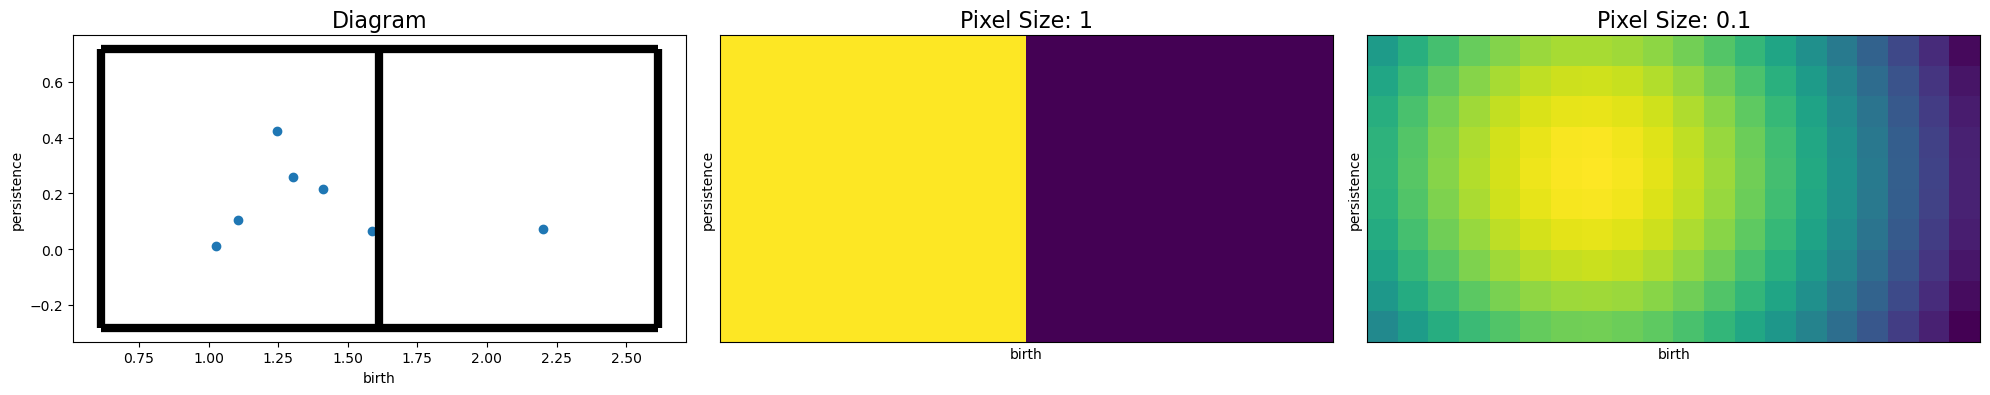

In [106]:
# The resolution of the persistence image is adjusted by choosing the pixel size, given in the same units as the diagram
pimgr = PersistenceImager(pixel_size=1)
pimgr.fit(H1_dgm)

fig, axs = plt.subplots(1, 3, figsize=(20,5))
pimgr.plot_diagram(H1_dgm, skew=True, ax=axs[0])
axs[0].set_title('Diagram', fontsize=16)

pimgr.plot_image(pimgr.transform(H1_dgm), ax=axs[1])
axs[1].set_title('Pixel Size: 1', fontsize=16)

pimgr.pixel_size = 0.1 
pimgr.plot_image(pimgr.transform(H1_dgm), ax=axs[2])
axs[2].set_title('Pixel Size: 0.1', fontsize=16)

plt.tight_layout()
plt.show()

In [109]:
H0_dgm = H0_dgm[:-1]

/Users/h6x/anaconda3/envs/TDA/lib/python3.11/site-packages/persim/images.py:800: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(bmin, bmax)
/Users/h6x/anaconda3/envs/TDA/lib/python3.11/site-packages/persim/images.py:805: RuntimeWarning: divide by zero encountered in scalar divide
  (1 / 50 * self.pixel_size)
/Users/h6x/anaconda3/envs/TDA/lib/python3.11/site-packages/matplotlib/lines.py:66: RuntimeWarning: invalid value encountered in scalar multiply
  scaled_offset = offset * lw
/Users/h6x/anaconda3/envs/TDA/lib/python3.11/site-packages/persim/images.py:866: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.matshow(pers_img.T, **{"origin": "lower"})


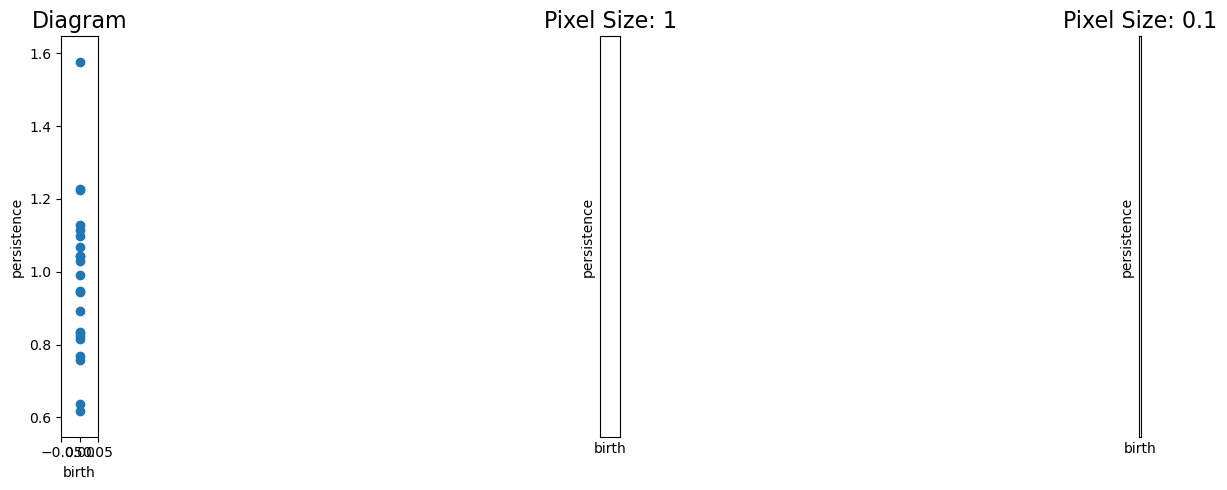

In [110]:
# The resolution of the persistence image is adjusted by choosing the pixel size, given in the same units as the diagram
pimgr = PersistenceImager(pixel_size=1)
pimgr.fit(H0_dgm)

fig, axs = plt.subplots(1, 3, figsize=(20,5))
pimgr.plot_diagram(H0_dgm, skew=True, ax=axs[0])
axs[0].set_title('Diagram', fontsize=16)

pimgr.plot_image(pimgr.transform(H0_dgm), ax=axs[1])
axs[1].set_title('Pixel Size: 1', fontsize=16)

pimgr.pixel_size = 0.1 
pimgr.plot_image(pimgr.transform(H0_dgm), ax=axs[2])
axs[2].set_title('Pixel Size: 0.1', fontsize=16)

plt.tight_layout()
plt.show()